In [30]:
%matplotlib inline

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fasttext
from pycountry import languages
import re



In [32]:
# reading in the cleaned data
data = pd.read_json("PRC-UK_Embassy_press_releases_cleaned.ndjson",lines=True)

In [33]:
# checking the format of the data
data.head()

,storage_url,title,date,body,ambassador,title_length,body_length
0,https://web.archive.org/web/20211130031323/htt...,Embassy Spokesperson's Remarks on Chinese oper...,2020-08-24 23:45:00,"Question: According to British media's report,...",Ambassador Liu Xiaoming,9,160
1,https://web.archive.org/web/20211130052058/htt...,Embassy Spokesperson's Remarks on issues relat...,2020-08-25 21:03:00,"Question: In an open letter, MPs will be urged...",Ambassador Liu Xiaoming,9,528
2,https://web.archive.org/web/20211130025452/htt...,Embassy Spokesperson's Remarks on issues relat...,2020-08-25 21:05:00,Question: A letter signed by religious leaders...,Ambassador Liu Xiaoming,9,818
3,https://web.archive.org/web/20211130042447/htt...,Embassy Spokesperson's Remarks on The Times' R...,2020-08-29 07:08:00,"Question: On 28 August, The Times carried a re...",Ambassador Liu Xiaoming,10,506
4,https://web.archive.org/web/20211130054122/htt...,Embassy Spokesperson's Remarks on the Claim by...,2020-09-01 23:40:00,"Question: On August 30th, Tom Tugendhat, Chair...",Ambassador Liu Xiaoming,15,314


### Exploring the distribution of Ambassador

Ambassador Liu Xiaoming     253
Ambassador Zheng Zeguang     97
Vacant                       23
Name: ambassador, dtype: int64

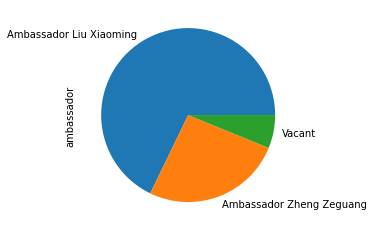

In [35]:
# comparing the appearances of Ambassador within the dataset
data["ambassador"].value_counts().plot.pie()
data["ambassador"].value_counts()

### Exploring the Title and Body length

#### Title Length

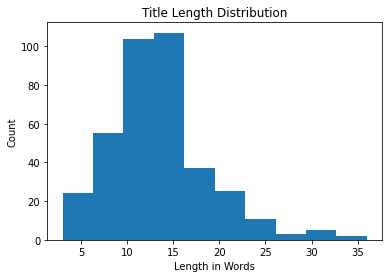

In [5]:
# basic exploration of title length
data["title_length"].plot.hist()
plt.title("Title Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

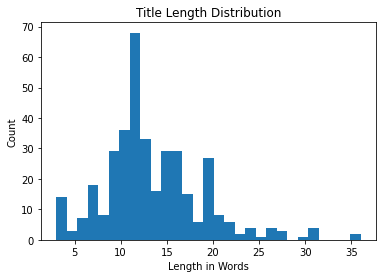

In [6]:
# exploring the distribution of title length with higher granularity
data["title_length"].plot.hist(bins=len(data["title_length"].value_counts()))
plt.title("Title Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

These both show that the length in words for the titles tend to cluster around 10 to around 15 words.

#### Body Length

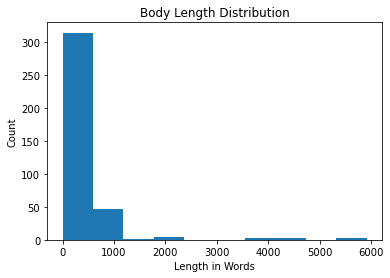

In [7]:
data["body_length"].plot.hist()
plt.title("Body Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

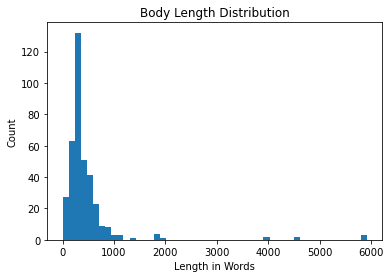

In [8]:
data["body_length"].plot.hist(bins=50)
plt.title("Body Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

These show that the press releases are generally around 400-800 words in length.

### Comparing Ambassadors on the descriptive statistics for title and body length

#### Looking at title length in a little greater detail

In [9]:
# looking at the descriptive statistics for title length
data["title_length"].groupby(data["ambassador"]).describe()

,count,mean,std,min,25%,50%,75%,max
ambassador,,,,,,,,
Ambassador Liu Xiaoming,253.0,13.474308,5.867953,3.0,10.0,12.0,16.0,36.0
Ambassador Zheng Zeguang,97.0,12.927835,4.279913,7.0,10.0,13.0,16.0,30.0
Vacant,23.0,15.391304,5.475060,8.0,12.0,15.0,17.5,31.0


In [10]:
# looking at the median for title length
data["title_length"].groupby(data["ambassador"]).median()

ambassador
Ambassador Liu Xiaoming     12
Ambassador Zheng Zeguang    13
Vacant                      15
Name: title_length, dtype: int64

In [11]:
# looking at the variance for title length
data["title_length"].groupby(data["ambassador"]).var()

ambassador
Ambassador Liu Xiaoming     34.432869
Ambassador Zheng Zeguang    18.317655
Vacant                      29.976285
Name: title_length, dtype: float64

#### Looking at body length in a little greater detail

In [12]:
# looking at the descriptive statistics for body length
data["body_length"].groupby(data["ambassador"]).describe()

,count,mean,std,min,25%,50%,75%,max
ambassador,,,,,,,,
Ambassador Liu Xiaoming,253.0,479.486166,812.070832,0.0,223.0,304.0,418.0,5921.0
Ambassador Zheng Zeguang,97.0,468.721649,310.723542,128.0,268.0,397.0,555.0,1926.0
Vacant,23.0,368.434783,199.139701,111.0,221.0,320.0,539.5,715.0


In [13]:
# looking at the median for body length
data["body_length"].groupby(data["ambassador"]).median()

ambassador
Ambassador Liu Xiaoming     304
Ambassador Zheng Zeguang    397
Vacant                      320
Name: body_length, dtype: int64

In [14]:
# looking at variance for body length
data["body_length"].groupby(data["ambassador"]).var()

ambassador
Ambassador Liu Xiaoming     659459.036514
Ambassador Zheng Zeguang     96549.119631
Vacant                       39656.620553
Name: body_length, dtype: float64

### Statistical Significance Tests

In [15]:
# fill in when I get a chance to figure out what's applicable here
# I think I might buy myself the stats book as a gift so I can brush up...

### Looking at the distribution over time of press releases

#### Distributions over time


Text(0, 0.5, '# of press releases')

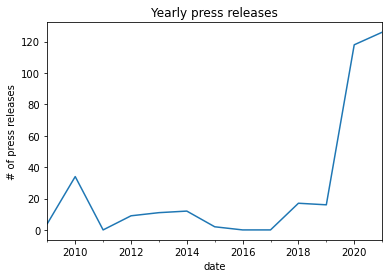

In [16]:
# showing the trends in press releases over time on a yearly basis
data.resample("Y",on="date").count().plot(y="body")
plt.title("Yearly press releases")
plt.legend('',frameon=False)
plt.ylabel("# of press releases")

Text(0, 0.5, '# of press releases')

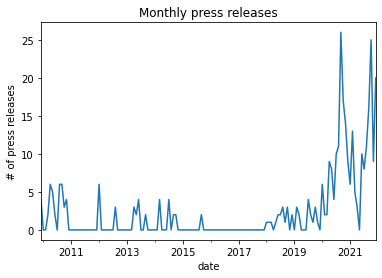

In [17]:
# showing the trends in press releases over time on a monthly basis
data.resample("M",on="date").count().plot(y="body")
plt.title("Monthly press releases")
plt.legend('',frameon=False)
plt.ylabel("# of press releases")

#### Yearly distribution

In [18]:
# by taking two columns, grouping them, and then resampling them, while taking the count, we can find the yearly count
# grouping by ambassador allows for an easy showing of the count by year
data[["date","ambassador"]].groupby(data["ambassador"]).resample("Y", on="date").count()

date  ambassador
ambassador               date                        
Ambassador Liu Xiaoming  2009-12-31     4           4
                         2010-12-31    34          34
                         2011-12-31     0           0
                         2012-12-31     9           9
                         2013-12-31    11          11
                         2014-12-31    12          12
                         2015-12-31     2           2
                         2016-12-31     0           0
                         2017-12-31     0           0
                         2018-12-31    17          17
                         2019-12-31    16          16
                         2020-12-31   118         118
                         2021-12-31     6           6
Ambassador Zheng Zeguang 2021-12-31    97          97
Vacant                   2021-12-31    23          23

<AxesSubplot:xlabel='date'>

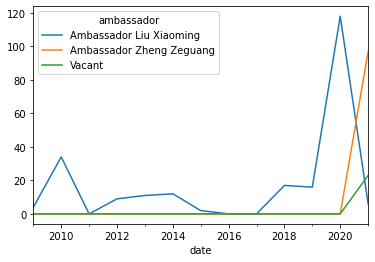

In [19]:
# by unstacking the resampling by ambasador & then selecting the date column & plotting it, we can show the yearly trend
grouped = data[["date","ambassador"]].groupby(data["ambassador"]).resample("Y", on="date").count()
grouped.unstack("ambassador",fill_value=0)["date"].plot()

#### Monthly Distribution

In [20]:
# starting by filtering the data down to just 2021, then using a groupby and resampling on a monthly basis
monthly = data.loc[data["date"] > "2020-12-31",["date","ambassador"]].groupby(data["ambassador"]).resample("M", on="date").count()
# going ahead and unstacking
monthly = monthly.unstack("ambassador",fill_value=0)["date"]

In [21]:
# printing the monthly count
monthly

ambassador,Ambassador Liu Xiaoming,Ambassador Zheng Zeguang,Vacant
date,,,
2021-01-31,6,0,0
2021-02-28,0,0,13
2021-03-31,0,0,5
2021-04-30,0,0,3
2021-05-31,0,0,0
2021-06-30,0,8,2
2021-07-31,0,8,0
2021-08-31,0,11,0
2021-09-30,0,16,0


<AxesSubplot:xlabel='date'>

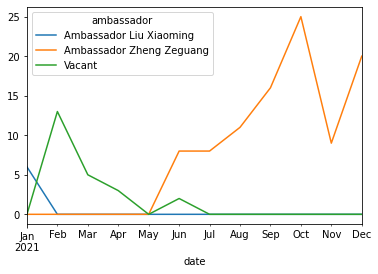

In [22]:
# plotting the monthly count
monthly.plot()

### Trends in title & body length over time

#### Looking at trends within title and body length over time

<AxesSubplot:xlabel='date'>

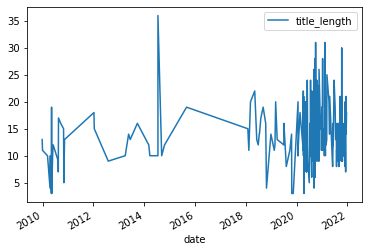

In [23]:
# exploring the time series data of the title length
data.plot(x="date",y="title_length")

<AxesSubplot:xlabel='date'>

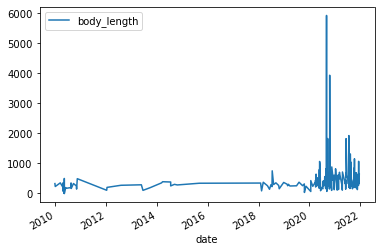

In [24]:
# exploring the time series data of the body length
data.plot(x="date",y="body_length")

#### Mean title & body length over time


<AxesSubplot:xlabel='date'>

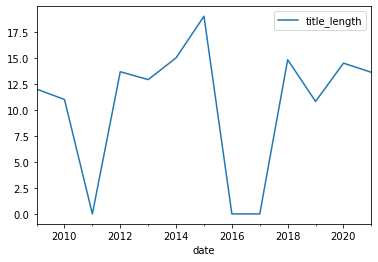

In [25]:
# looking at the mean title length over time
data.resample("Y", on="date").mean().fillna(0).plot(y="title_length")

<AxesSubplot:xlabel='date'>

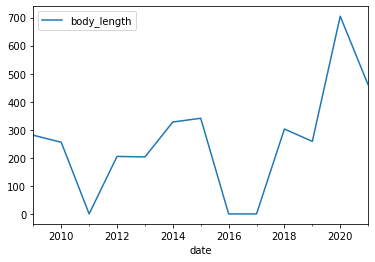

In [26]:
# looking at the mean body length over time
data.resample("Y", on="date").mean().fillna(0).plot(y="body_length")

#### Looking at Title & Body Length by Ambassador